## Ejercicio 3: 

Crea un script que genere 5 secuencias de 5 nucleótidos de forma aleatoria, que queden almacenadas en un archivo FASTA. 

A partir de ahí, cargue el archivo FASTA y genera los correspondientes árboles utilizando el método de máxima parsimonia y el método de distancia (selecciona la distancia que desees, y emplea UPGMA y el método Neighboor Joining). Compara los árboles/resultados y desarrolla alguna conclusión.

In [69]:
import random
from Bio import AlignIO
from generators.generatorTree import GeneratorTreeFactory
from Bio import Phylo
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter
from itertools import combinations

## 1. Generación de secuencias aleatorias

In [3]:
def generar_secuencia(longitud):
    nucleotidos = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(nucleotidos) for _ in range(longitud))

def crear_fasta(nombre_archivo, num_secuencias, longitud):
    with open(nombre_archivo, 'w') as archivo:
        for i in range(1, num_secuencias + 1):
            secuencia = generar_secuencia(longitud)
            archivo.write(f">Secuencia_{i}\n")  # Encabezado FASTA
            archivo.write(f"{secuencia}\n")

In [4]:
nombre_archivo = "./fasta_files/secuencias.fasta"
num_secuencias = 5
longitud_secuencia = 5

crear_fasta(nombre_archivo, num_secuencias, longitud_secuencia)

print(f"Archivo {nombre_archivo} generado con {num_secuencias} secuencias de {longitud_secuencia} nucleótidos.")

Archivo ./fasta_files/secuencias.fasta generado con 5 secuencias de 5 nucleótidos.


## 2. Generación de árboles mediante el método de máxima parsimonia

In [2]:
def cargar_fasta(nombre_archivo):
    return AlignIO.read(nombre_archivo, "fasta")

In [3]:
nombre_archivo = "./fasta_files/secuencias.fasta"
sequences = cargar_fasta(nombre_archivo)

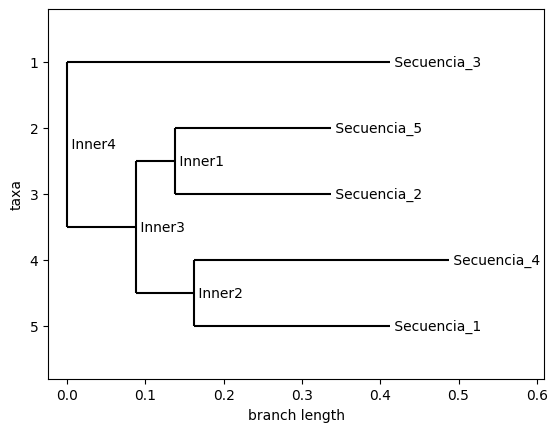

In [4]:
generator = GeneratorTreeFactory().initialize_generator('ParsimoniaTree')
tree_parsimonia = generator.generate_tree(sequences)
generator.show_tree(tree_parsimonia)

## 3. Generación de árboles mediante el método de distancia

In [5]:
generator = GeneratorTreeFactory().initialize_generator('DistanceTree')

### 3.1 UPGMA - Unweighted Pair Group Method with Arithmetic mean

#### 3.1.1. Cálculo de la distancia como la proporción de posiciones no idénticas entre dos secuencias - `identity`

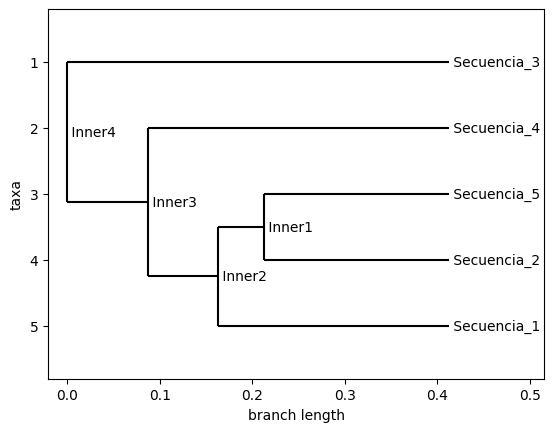

In [6]:
tree_upgma_identity = generator.generate_tree_upgma(sequences, 'identity')
generator.show_tree(tree_upgma_identity)

#### 3.1.2. Cálculo de la distancia utilizando herramientas como BLAST para determinar una distancia basada en alineamientos entre las secuencias. - `blastn`

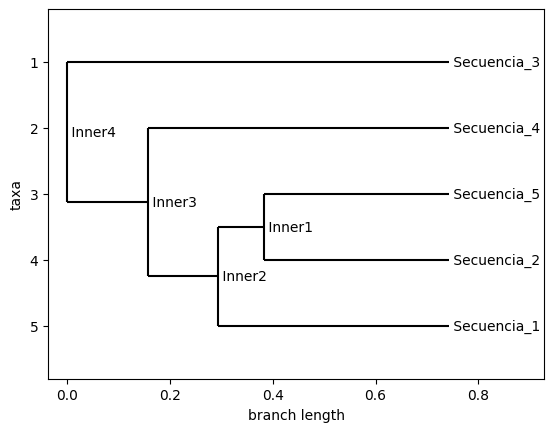

In [7]:
tree_upgma_blastn = generator.generate_tree_upgma(sequences, 'blastn')
generator.show_tree(tree_upgma_blastn)

#### 3.1.3. Cálculo de la distancia utilizando una matriz de puntuación para transiciones y transversiones que influye en cómo se calculan las distancias entre secuencias - `trans`

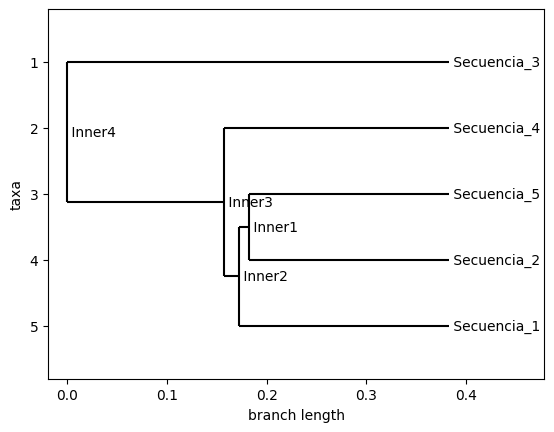

In [8]:
tree_upgma_trans = generator.generate_tree_upgma(sequences, 'trans')
generator.show_tree(tree_upgma_trans)

### 3.2 NJ - Neighboor Joining

#### 3.2.1. Cálculo de la distancia como la proporción de posiciones no idénticas entre dos secuencias - `identity`

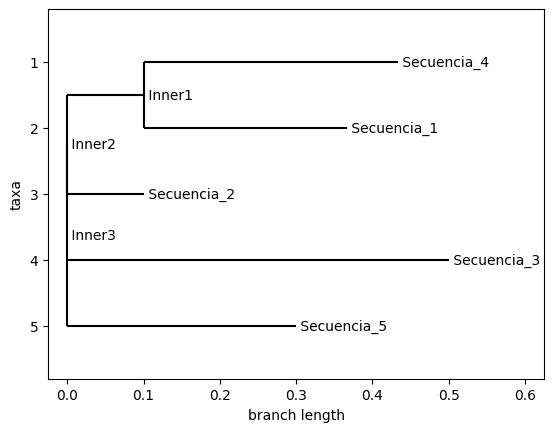

In [9]:
tree_nj_identitiy = generator.generate_tree_nj(sequences, 'identity')
generator.show_tree(tree_nj_identitiy)

#### 3.2.2. Cálculo de la distancia utilizando herramientas como BLAST para determinar una distancia basada en alineamientos entre las secuencias. - `blastn`

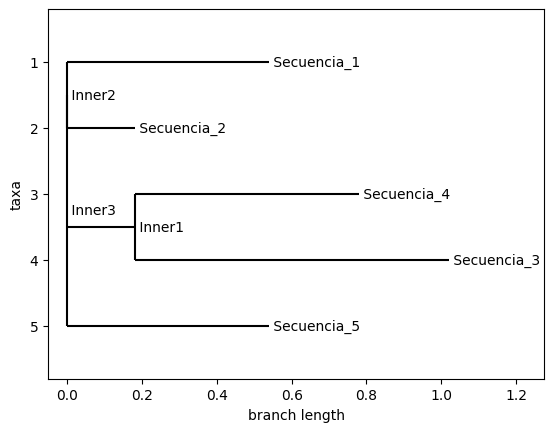

In [10]:
tree_nj_blastn = generator.generate_tree_nj(sequences, 'blastn')
generator.show_tree(tree_nj_blastn)

#### 3.2.3. Cálculo de la distancia utilizando una matriz de puntuación para transiciones y transversiones que influye en cómo se calculan las distancias entre secuencias - `trans`

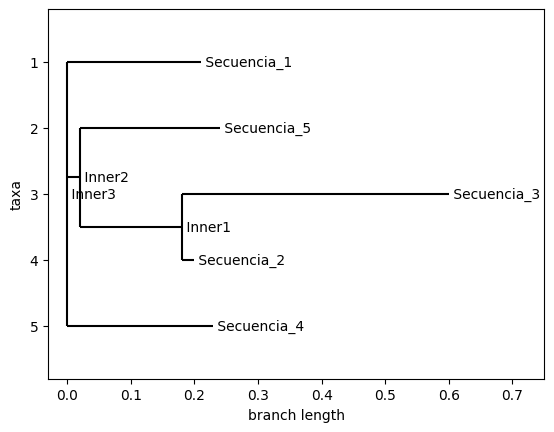

In [11]:
tree_nj_trans = generator.generate_tree_nj(sequences, 'trans')
generator.show_tree(tree_nj_trans)

## 4. Comaración de los árboles/resultados y conclusiones

### 4.1. Comparación de los ancestros comunes

In [12]:
sequences_names = {"Secuencia_1": "A", "Secuencia_2": "B", "Secuencia_3": "C", "Secuencia_4": "D", "Secuencia_5": "E"}

In [26]:
def generate_internal_label(clade):
    descendant_names = sorted([term.name for term in clade.get_terminals() if term.name])
    return f"{''.join(descendant_names)}"

def change_labels(tree, sequences_names):
    for leaf in tree.get_terminals():
        if leaf.name in sequences_names:
            leaf.name = sequences_names[leaf.name]
    
    for clade in tree.find_clades():
        if clade.is_terminal():
            continue
        clade.name = generate_internal_label(clade)
    return tree

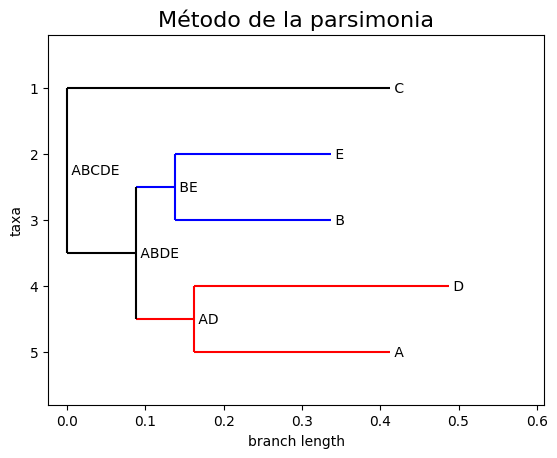

In [27]:
tree_parsimonia = change_labels(tree_parsimonia, sequences_names)

mrca = tree_parsimonia.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

mrca = tree_parsimonia.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'

fig, ax = plt.subplots()

Phylo.draw(tree_parsimonia, do_show=False, axes=ax)
ax.set_title("Método de la parsimonia", fontsize=16)

plt.show()

In [28]:
tree_upgma_identity = change_labels(tree_upgma_identity, sequences_names)
mrca = tree_upgma_identity.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_upgma_identity.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

tree_upgma_blastn = change_labels(tree_upgma_blastn, sequences_names)
mrca = tree_upgma_blastn.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_upgma_blastn.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

tree_upgma_trans = change_labels(tree_upgma_trans, sequences_names)
mrca = tree_upgma_trans.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_upgma_trans.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

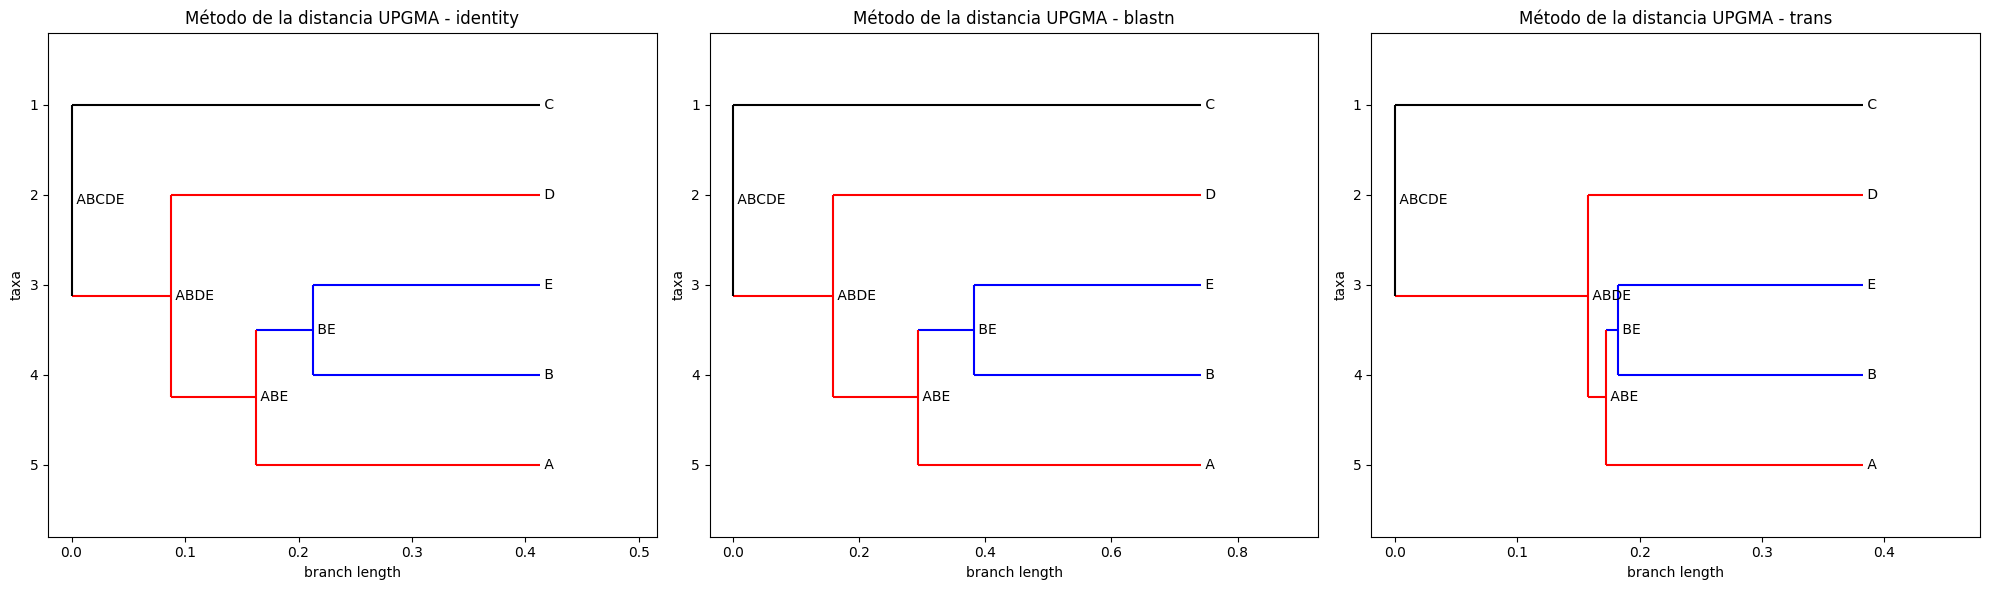

In [31]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

Phylo.draw(tree_upgma_identity, do_show=False, axes=axes[0])
axes[0].set_title("Método de la distancia UPGMA - identity", fontsize=12)

Phylo.draw(tree_upgma_blastn, do_show=False, axes=axes[1])
axes[1].set_title("Método de la distancia UPGMA - blastn", fontsize=12)

Phylo.draw(tree_upgma_trans, do_show=False, axes=axes[2])
axes[2].set_title("Método de la distancia UPGMA - trans", fontsize=12)

plt.tight_layout()
plt.show()

In [37]:
tree_nj_identitiy = change_labels(tree_nj_identitiy, sequences_names)
mrca = tree_nj_identitiy.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_nj_identitiy.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

tree_nj_blastn = change_labels(tree_nj_blastn, sequences_names)
mrca = tree_nj_blastn.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'orange'
mrca = tree_nj_blastn.common_ancestor({"name": "C"}, {"name": "D"})
mrca.color = 'green'

tree_nj_trans = change_labels(tree_nj_trans, sequences_names)
mrca = tree_nj_trans.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_nj_trans.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

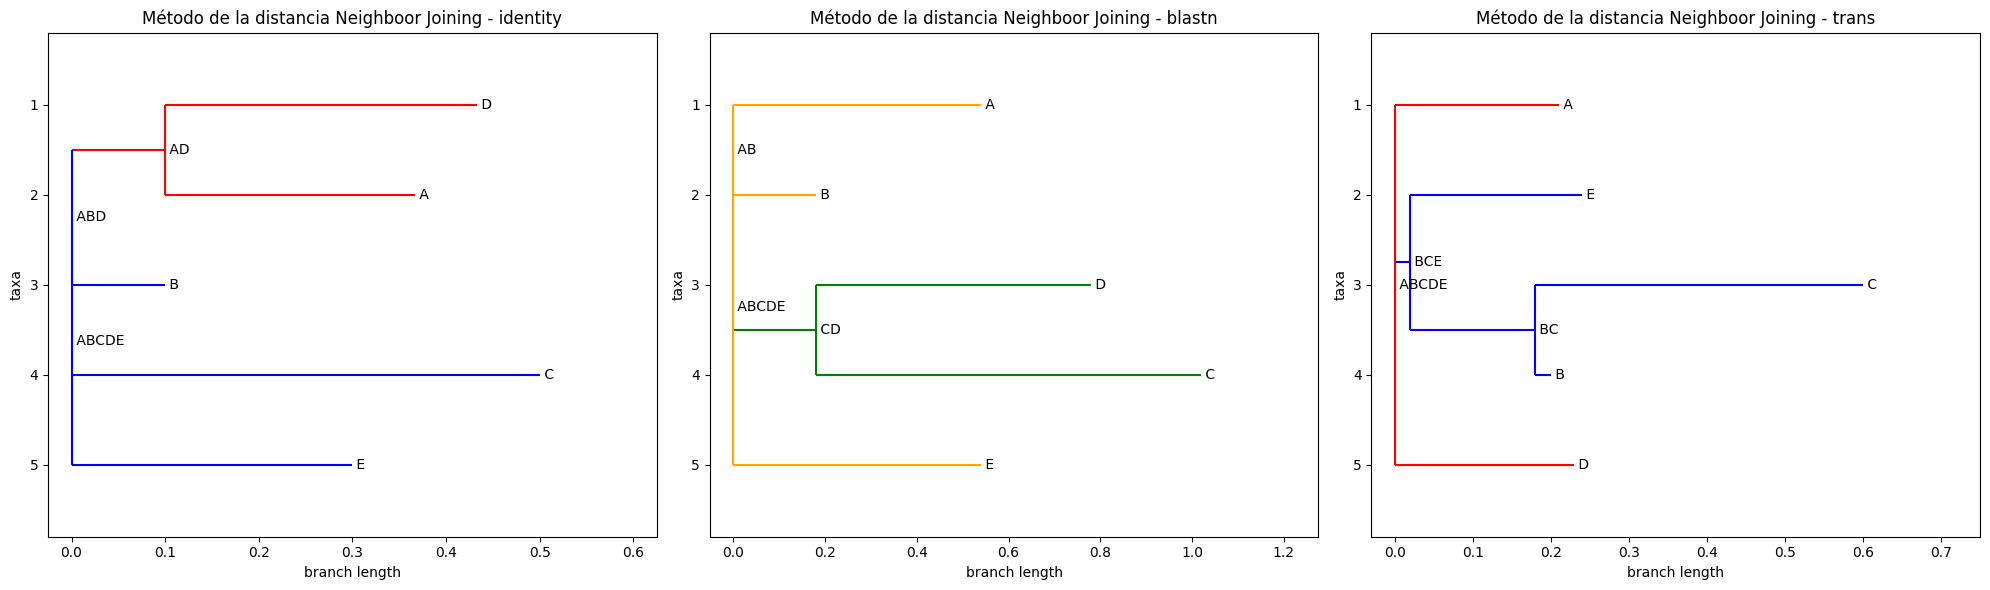

In [38]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

Phylo.draw(tree_nj_identitiy, do_show=False, axes=axes[0])
axes[0].set_title("Método de la distancia Neighboor Joining - identity", fontsize=12)

Phylo.draw(tree_nj_blastn, do_show=False, axes=axes[1])
axes[1].set_title("Método de la distancia Neighboor Joining - blastn", fontsize=12)

Phylo.draw(tree_nj_trans, do_show=False, axes=axes[2])
axes[2].set_title("Método de la distancia Neighboor Joining - trans", fontsize=12)

plt.tight_layout()
plt.show()

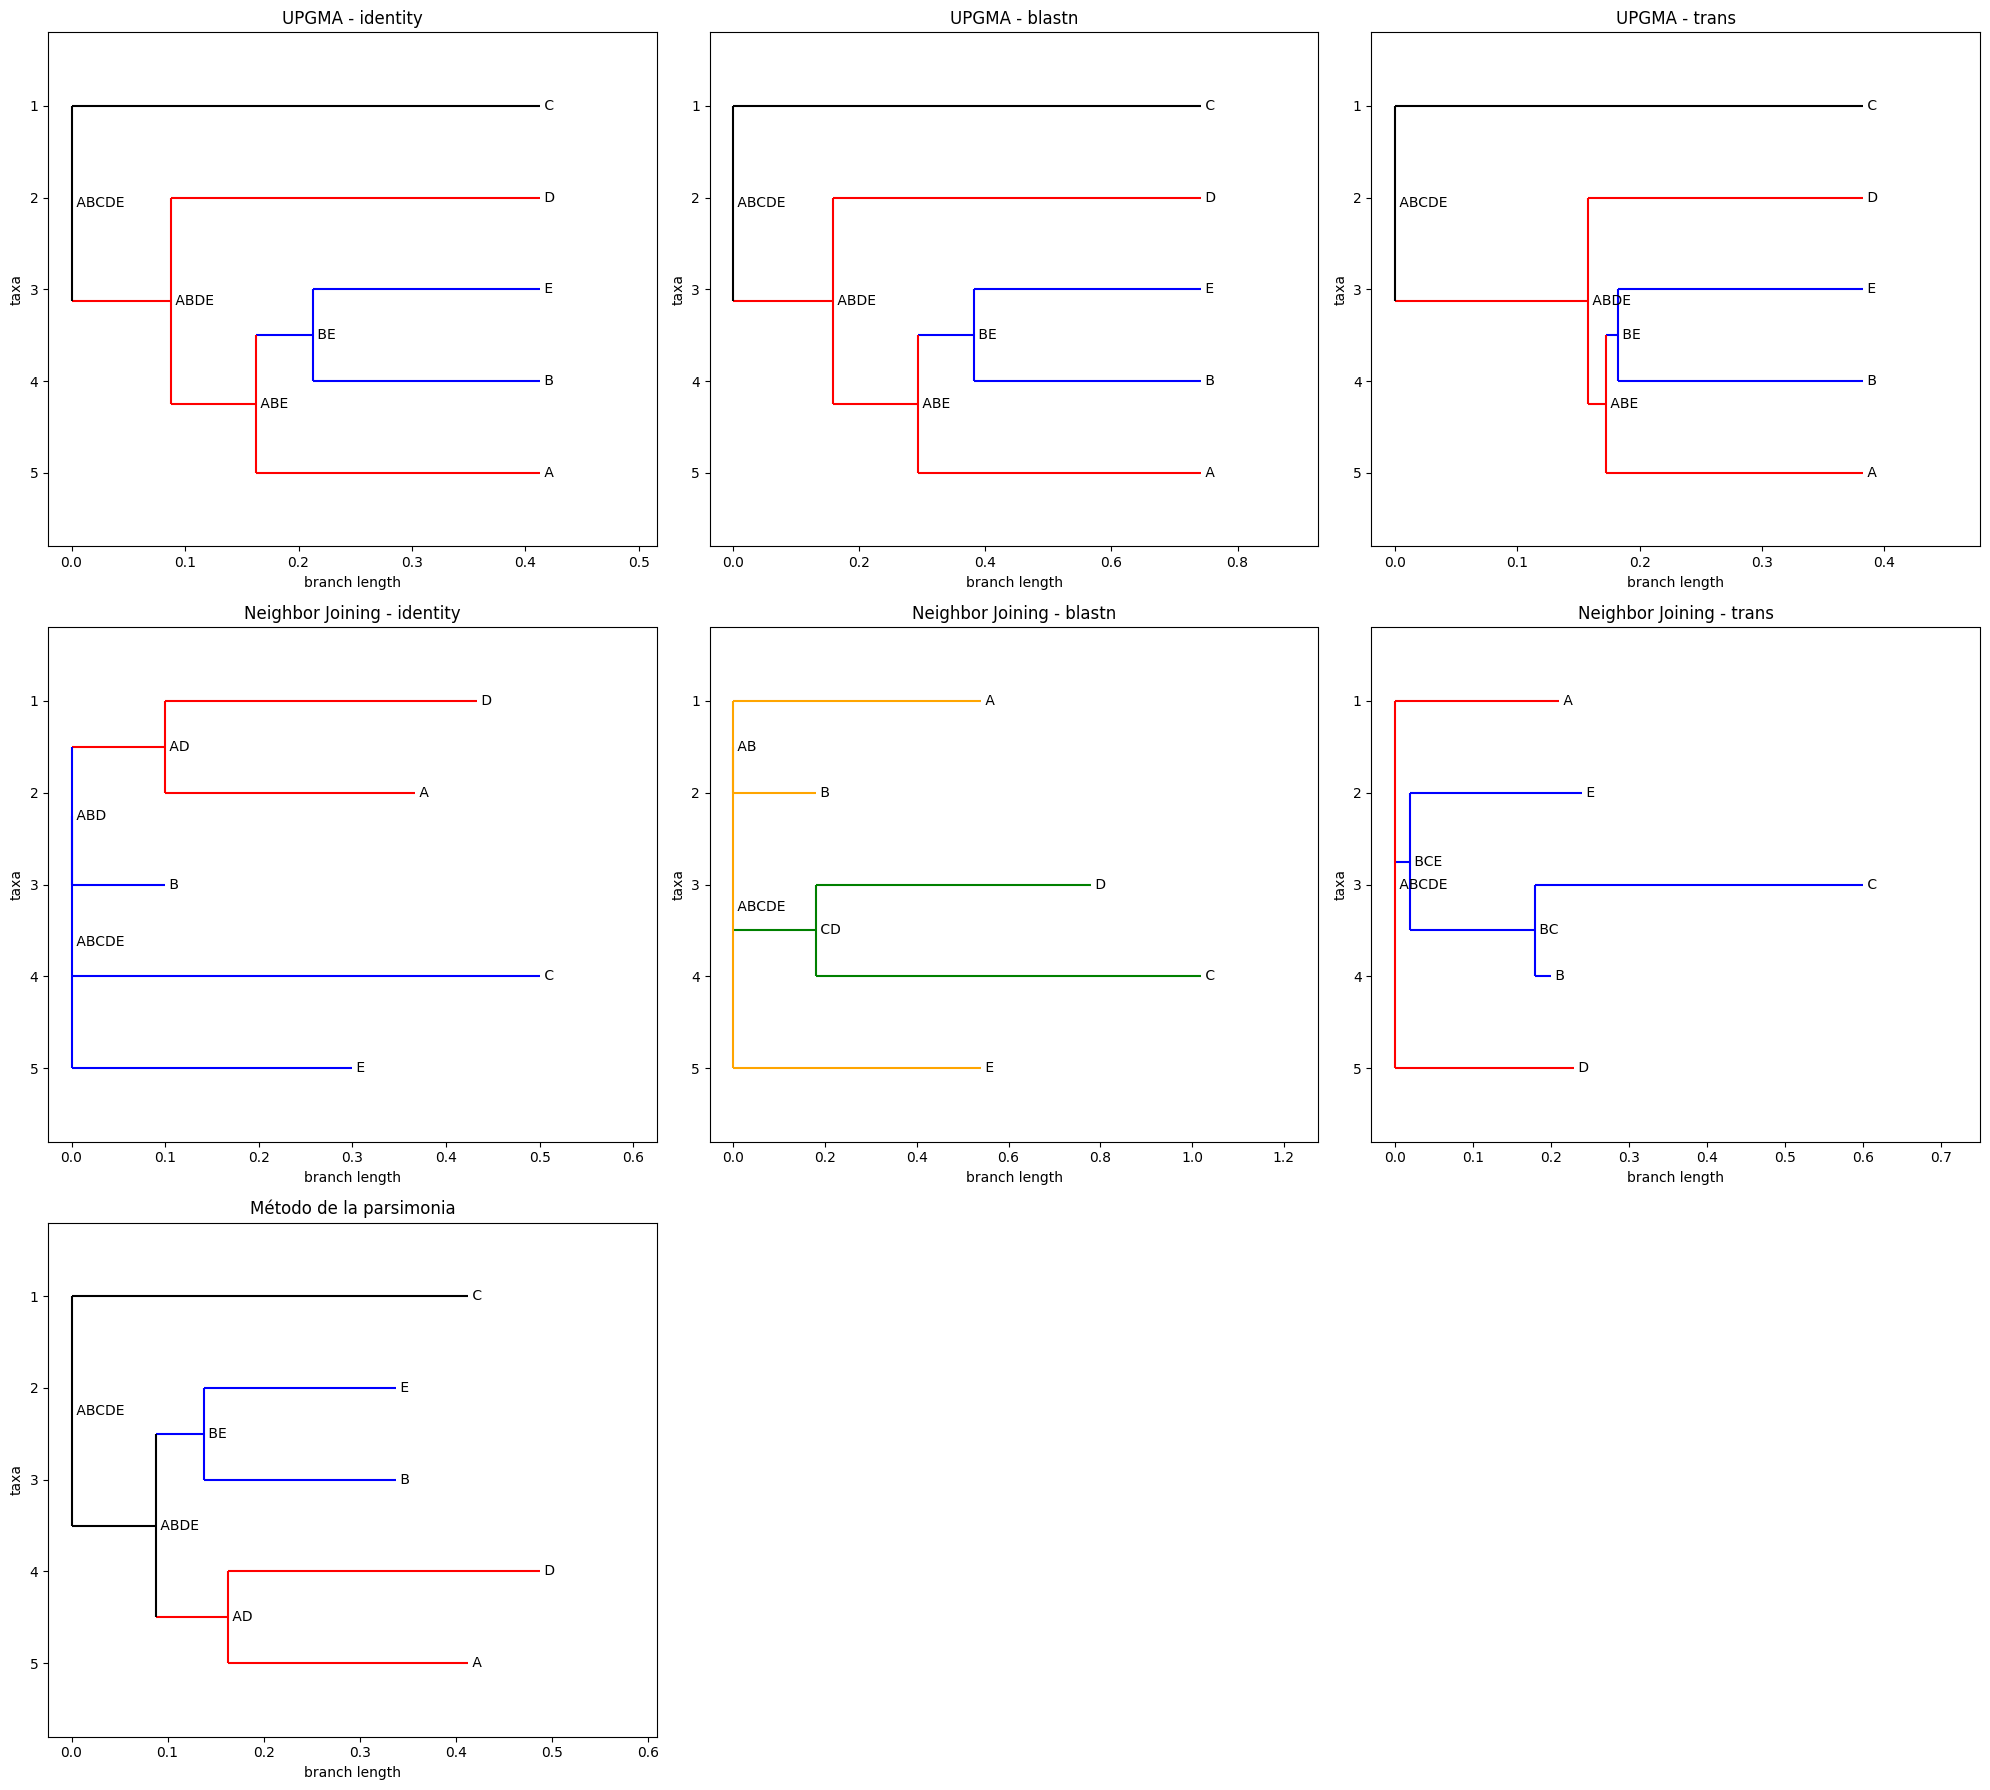

In [ ]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# Gráficas del método de distancia UPGMA
Phylo.draw(tree_upgma_identity, do_show=False, axes=axes[0, 0])
axes[0, 0].set_title("UPGMA - identity", fontsize=12)

Phylo.draw(tree_upgma_blastn, do_show=False, axes=axes[0, 1])
axes[0, 1].set_title("UPGMA - blastn", fontsize=12)

Phylo.draw(tree_upgma_trans, do_show=False, axes=axes[0, 2])
axes[0, 2].set_title("UPGMA - trans", fontsize=12)

# Gráficas del método Neighbor Joining
Phylo.draw(tree_nj_identitiy, do_show=False, axes=axes[1, 0])
axes[1, 0].set_title("Neighbor Joining - identity", fontsize=12)

Phylo.draw(tree_nj_blastn, do_show=False, axes=axes[1, 1])
axes[1, 1].set_title("Neighbor Joining - blastn", fontsize=12)

Phylo.draw(tree_nj_trans, do_show=False, axes=axes[1, 2])
axes[1, 2].set_title("Neighbor Joining - trans", fontsize=12)

# Gráfica del árbol del método de parsimonia
Phylo.draw(tree_parsimonia, do_show=False, axes=axes[2, 0])
axes[2, 0].set_title("Método de la parsimonia", fontsize=12)

axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()
plt.show()

**Conclusiones**
1. **Comparación entre métodos**:
   - El método de la parsimonia se enfoca en la minimización de cambios evolutivos y puede ser útil cuando se trabaja con datos filogenéticos bien entendidos y simples.
   - Los métodos de distancia (UPGMA y Neighbor Joining) proporcionan árboles que reflejan similitudes cuantificables basadas en las distancias calculadas, pero pueden ser sensibles al tipo de distancia empleada.

2. **Variabilidad entre distancias**:
   - Las distancias utilizadas (identity, blastn, trans) afectan directamente las agrupaciones observadas en el método *Neighboor Joining*. Sin embargo, en cuanto al método *UPGMA*, únicamente afecta a la medida de distancias y no a sus agrupaciones. Esto sugiere que la elección de la distancia es crucial y puede influir en las conclusiones derivadas de los árboles.

3. **Robustez de Neighbor Joining**:
   - Neighbor Joining, al no asumir una tasa constante de evolución, puede ser más adecuado para datos con variaciones significativas en las tasas evolutivas.

4. **Limitaciones**:
   - UPGMA asume un reloj molecular (tasa constante de evolución), lo que puede no ser aplicable en ciertos contextos evolutivos, introduciendo sesgos en los agrupamientos.
   - Parsimonia, aunque eficiente, puede perder precisión cuando las tasas de evolución son muy altas o las secuencias son muy divergentes.

En definitiva, la elección del método depende del objetivo del análisis. Para árboles rápidos basados en similitudes, UPGMA puede ser útil, mientras que Neighbor Joining es más robusto frente a variaciones evolutivas. Es importante combinar los resultados de varios métodos y distancias para obtener una visión integral de las relaciones evolutivas.

### 4.2. Comparación de medidas numéricas

#### 4.2.1 Longitud total del árbol

La longitud total del árbol es la suma de todas las longitudes de las ramas. Esto puede interpretarse como una medida de la divergencia acumulada entre las secuencias.

In [70]:
def total_branch_length(tree):
    return sum(branch.branch_length for branch in tree.get_nonterminals() + tree.get_terminals() if branch.branch_length)

#### 4.2.2 Profundidad máxima (altura del árbol)

La profundidad máxima del árbol mide la distancia evolutiva máxima desde la raíz hasta cualquier nodo terminal. Es útil para comparar niveles de divergencia.

In [71]:
def max_depth(tree):
    return max(tree.depths().values())

#### 4.2.3 Longitud promedio de las ramas

La longitud promedio de las ramas te da una idea del grado promedio de divergencia entre los nodos.

In [72]:
def average_branch_length(tree):
    branch_lengths = [branch.branch_length for branch in tree.get_nonterminals() + tree.get_terminals() if branch.branch_length]
    return sum(branch_lengths) / len(branch_lengths)

#### 4.2.4 Número de nodos internos y terminales

El número de nodos internos y hojas (terminales) puede describir la complejidad y resolución del árbol.

In [73]:
def num_internal_nodes(tree):
    return len(tree.get_nonterminals())

def num_terminal_nodes(tree):
    return len(tree.get_terminals())

#### 4.2.5 Balance del árbol
El balance del árbol mide la simetría entre las ramas. Árboles muy desbalanceados pueden indicar una alta disparidad en las tasas evolutivas entre los linajes.


In [95]:
def compute_balance(tree):
    from collections import Counter
    leaf_counts = [len(clade.get_terminals()) for clade in tree.get_nonterminals()]
    balance = Counter(leaf_counts)
    return str(balance)

#### 4.2.6 Distancia promedio entre nodos terminales

La distancia promedio entre nodos terminales mide la divergencia promedio entre todas las secuencias.

In [96]:
def average_terminal_distance(tree):
    distances = []
    for clade1, clade2 in combinations(tree.get_terminals(), 2):
        mrca = tree.common_ancestor(clade1, clade2)
        distances.append(tree.distance(mrca, clade1) + tree.distance(mrca, clade2))
    return sum(distances) / len(distances)

#### 4.2.7 Número de bifurcaciones (topología)

El número de bifurcaciones en el árbol puede proporcionar información sobre la resolución del árbol y los posibles puntos de especiación.


In [97]:
def num_bifurcations(tree):
    return len(tree.get_nonterminals())

#### 4.2.8 Ultralinearidad del árbol (solo UPGMA)

Se verifica si el árbol UPGMA es ultramétrico, es decir, si todas las hojas tienen la misma distancia desde la raíz.

In [98]:
def is_ultrametric(tree):
    depths = [tree.distance(tree.root, terminal) for terminal in tree.get_terminals()]
    return len(set(depths)) == 1

#### 4.2.9 Presentación de las métricas

In [99]:
metricas = pd.DataFrame()

trees = {
    "Parsimonia": tree_parsimonia,
    "UPGMA - Identity": tree_upgma_identity,
    "UPGMA - Blastn": tree_upgma_blastn,
    "UPGMA - Trans": tree_upgma_trans,
    "NJ - Identity": tree_nj_identitiy,
    "NJ - Blastn": tree_nj_blastn,
    "NJ - Trans": tree_nj_trans
}

metricas = {
    "Longitud Total del Árbol": total_branch_length,
    "Profundidad Máxima": max_depth,
    "Longitud Promedio de Ramas": average_branch_length,
    "Número de Nodos Internos": num_internal_nodes,
    "Número de Nodos Terminales": num_terminal_nodes,
    "Balance del Árbol": compute_balance,
    "Distancia Promedio entre Terminales": average_terminal_distance,
    "Número de Bifurcaciones": num_bifurcations,
    "Es Ultramétrico": is_ultrametric
}

df_metricas = pd.DataFrame(index=metricas.keys(), columns=trees.keys())

for metodo, tree in trees.items():
    for metrica, func in metricas.items():
        try:
            df_metricas.loc[metrica, metodo] = func(tree)
        except Exception as e:
            df_metricas.loc[metrica, metodo] = f"Error: {e}"

In [100]:
display(df_metricas)

,Parsimonia,UPGMA - Identity,UPGMA - Blastn,UPGMA - Trans,NJ - Identity,NJ - Blastn,NJ - Trans
Longitud Total del Árbol,1.6,1.6,2.88,1.4,1.6,2.88,1.28
Profundidad Máxima,0.4875,0.4125,0.7425,0.3825,0.5,1.02,0.6
Longitud Promedio de Ramas,0.2,0.2,0.36,0.175,0.266667,0.411429,0.182857
Número de Nodos Internos,4,4,4,4,3,3,3
Número de Nodos Terminales,5,5,5,5,5,5,5
Balance del Árbol,"Counter({2: 2, 5: 1, 4: 1})","Counter({5: 1, 4: 1, 3: 1, 2: 1})","Counter({5: 1, 4: 1, 3: 1, 2: 1})","Counter({5: 1, 4: 1, 3: 1, 2: 1})","Counter({5: 1, 3: 1, 2: 1})","Counter({2: 2, 5: 1})","Counter({5: 1, 3: 1, 2: 1})"
Distancia Promedio entre Terminales,0.665,0.665,1.197,0.565,0.66,1.188,0.548
Número de Bifurcaciones,4,4,4,4,3,3,3
Es Ultramétrico,False,True,True,True,False,False,False
